# 웹 데이터를 수집하는 방법

* 웹 사이트를 크롤링하는 방법
* 사이트에서 제공하는 API를 사용하는 방법

오늘의 목표: 크롤링을 사용한 데이터 수집

-------------------------------
## 크롤링
웹 사이트를 돌아다니며 웹 문서를 수집하는 것.
## 스크래핑
크롤링하면서 응답으로 받은 html 문서를 수집하고, 필요한 정보를 추출하는 활동


크롤링은 프로그램이 자동으로 수행하기 때문에, 잘못된 프로그램을 작성하거나 짧은 간격으로 계속해서 서버에 접속할 경우 웹 사이트의 성능을 저하시킬 수 있다.

웹 사이트의 메인 URL에 있는 robots.txt를 확인하고 이에 따라 크롤링을 하는 것이 좋다.

-------------------------
브라우저 없이 파이썬으로 서버에 HTTP 요청을 보내기 위해서는 
파이썬 내장 모튤인 urllib을 사용하거나 requests 패키지를 사용하는 방법이 있다.


In [6]:
#urllib을 이용한 웹페이지 추출
from urllib.request import urlopen
f = urlopen('http://hanbit.co.kr')
# urllib은 별도의 설치 없이 간편하게 HTTP requests를 보낼 수 있는 장점이 있다.
#urlopen() 함수는 HTTPresponce 자료형의 객체를 반환
#파일 객체이므로 open()함수로 반환되는 파일 객체처럼 핸들링
type(f)

http.client.HTTPResponse

In [8]:
f.status

200

In [9]:
f.getheader('Content-Type')

'text/html; charset=UTF-8'

그러나 urllib을 사용하여 HTTP reqest를 보내는 경우 로그인하거나 세션을 유지하기
번거롭고 requests보다 느리다. 

암튼 request를 더 많이 사용함

In [10]:
import requests

# requests 패키지에서 제공하는 주요 기능

## request(요청)
* requests.get('사이트 주소') = HTTP GET 요청
* requests.post('사이트 주소', data= {'key':'value'}) = HTTP POST 요청

## responce(응답)
* response.status_code = 상태코드
* response.text = 서버의 응답 형태가 html 문서인 경우
* response.content = 서버의 응답 형태가 바이트(이미지 등)인 경우
* response.json() = JSON 내장 디코더


In [11]:
url = 'http://www.google.com'
r = requests.get(url)

## HTML 상태코드
* 200 - 성공:서버가 요청을 제대로 처리함.
* 403 - 금지(Forbidden):사용자가 리소스에 대한 필요 권한을 가지고 있지 않아 요청 거부
* 404 - 찾을 수 없음(Not Found):서버에 존재하지 않는 페이지에 대한 요청을 한 경우

In [13]:
r.status_code

200

In [14]:
r.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="LEoL5H8WjKw9kFDdwijXTw">(function(){window.google={kEI:\'X_C7YuXNHMyD0PEPqta32Aw\',kEXPI:\'0,1302536,56873,6058,207,4804,2316,383,246,5,1354,4013,1123753,1197784,617,380090,16114,28684,17572,4858,1362,283,9008,3029,17579,4020,978,13228,516,3331,10622,7432,15309,6674,1279,2742,149,1103,840,6297,3514,606,2023,1777,520,6343,8327,3227,2845,7,17450,15768,552,4465,13142,3,346,230,6460,148,13975,4,1528,2304,7039,25073,2658,7357,13658,4437,16786,5827,2530,4094,17,4035,3,3541,1,11942,30212,2,14022,14116,11623,5679,1020,2381,2719,18260,2,6,7755,4567,6259,23418,1252,5835,14968,4332,19,4998,1072,1395,445,2,2,1,10789,167,15676,8155,2566,4016,739,60,13,3029,859,7872,2907,7341,2651,11804,7,1922,5706,3466,607,23,5416,901,

- html 원시코드는 수많은 태그와 데이터를 포함하고 있기 때문에 내용 확인이 어렵다.
- html 문서를 처리하기 위해서는 태그를 구분하여 처리하는 파싱 과정을 거쳐서 태그에 따라 위계 관계를 갖도록 표시하는 파서의 도움이 필요하다.
- beautifulsoup 패키지를 사용하여 html 문서를 파싱할 수 있다.

In [15]:
# requests모듈을 사용하여 구글 메인 페이지에 표시된 이미지 출력하기
url = 'https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
r = requests.get(url)
r.status_code

200

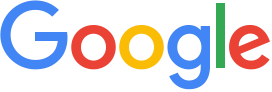

In [16]:
from PIL import Image
from io import BytesIO
Image.open(BytesIO(r.content))

# Beautifulsoup(bs4)
bs4를 사용하면 특정 태그 및 태그 속성을 포함한 구문을 빠르게 찾아낼 수 있다.

## bs4의 주요 함수
* find_all(태그) - 태그가 포함되어 있는 모든 문장 반환
* find(태그) - 태그가 포함되어 있는 모든 문장 중 가장 첫 번째 문장 반환
* select(선택지) - 선택자(selector)를 사용한 데이터 선택

In [17]:
from bs4 import BeautifulSoup

In [18]:
# 예제 html 파일이 로컬에 저장되어 있으므로, 파일 입출력 문법을 사용하여 파일을 읽기모드로 불러들이고 html 변수에 담는다.
filename = "index.html"
html = ""
with open (filename, 'r', encoding= 'UTF-8') as file:
    for line in file:
        html += line
html

'<div class="post-preview">\n\t<a href="index.html">\n\t   <h2 class="post-title">\n\t       단풍구경가자~~\n\t   </h2>\n\t   <h3 class="post-subtitle">\n\t      동키랑 단풍구경 다녀왔어요\n\t   </h3>\n\t</a>\n\t<p class="post-meta">September 24, 2021</p>\n </div>\n <hr>\n<div class="post-preview">\n\t<a href="index.html">\n\t   <h2 class="post-title">\n\t       다이어트 시작!\n\t   </h2>\n\t   <h3 class="post-subtitle">\n\t      꿀은 이제 그만, 날씬한 곰돌이로 다시 태어나기\n\t   </h3>\n\t</a>\n\t<p class="post-meta">June 18, 2021</p>\n </div>\n <hr>\n<div class="post-preview">\n\t<a href="index.html">\n\t   <h2 class="post-title">\n\t       꽃놀이간다!\n\t   </h2>\n\t   <h3 class="post-subtitle">\n\t      화창한 봄날, 티거랑 함께 산택간 이야기\n\t   </h3>\n\t</a>\n\t<p class="post-meta">March 24, 2021</p>\n </div>\n <hr>\n<div class="post-preview">\n\t<a href="index.html">\n\t   <h2 class="post-title">\n\t       내 꿀은 누가 다 먹었나?\n\t   </h2>\n\t   <h3 class="post-subtitle">\n\t      없어진 꿀의 행방을 찾아라\n\t   </h3>\n\t</a>\n\t<p class="post-meta">July 8, 

In [19]:
# 읽어들인 html을 파싱하는 BeautifulSoup 객체 생성
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'lxml')
soup
#태그에 따라 줄바꿈 처리가 되어서 가독성이 좋아진다

<html><body><div class="post-preview">
<a href="index.html">
<h2 class="post-title">
	       단풍구경가자~~
	   </h2>
<h3 class="post-subtitle">
	      동키랑 단풍구경 다녀왔어요
	   </h3>
</a>
<p class="post-meta">September 24, 2021</p>
</div>
<hr/>
<div class="post-preview">
<a href="index.html">
<h2 class="post-title">
	       다이어트 시작!
	   </h2>
<h3 class="post-subtitle">
	      꿀은 이제 그만, 날씬한 곰돌이로 다시 태어나기
	   </h3>
</a>
<p class="post-meta">June 18, 2021</p>
</div>
<hr/>
<div class="post-preview">
<a href="index.html">
<h2 class="post-title">
	       꽃놀이간다!
	   </h2>
<h3 class="post-subtitle">
	      화창한 봄날, 티거랑 함께 산택간 이야기
	   </h3>
</a>
<p class="post-meta">March 24, 2021</p>
</div>
<hr/>
<div class="post-preview">
<a href="index.html">
<h2 class="post-title">
	       내 꿀은 누가 다 먹었나?
	   </h2>
<h3 class="post-subtitle">
	      없어진 꿀의 행방을 찾아라
	   </h3>
</a>
<p class="post-meta">July 8, 2021</p>
</div>
<hr/></body></html>

In [21]:
# bs4의 주요 함수인 find(), find_all()을 사용하여 각 태그에 있는 값을 출력
soup.find('h2')
#입력된 태그가 포함된 모든 문장 중 가장 첫 번째 문장을 반환

<h2 class="post-title">
	       단풍구경가자~~
	   </h2>

In [22]:
soup.find_all('h2')
#입력된 태그가 포함된 모든 문장을 반환

[<h2 class="post-title">
 	       단풍구경가자~~
 	   </h2>, <h2 class="post-title">
 	       다이어트 시작!
 	   </h2>, <h2 class="post-title">
 	       꽃놀이간다!
 	   </h2>, <h2 class="post-title">
 	       내 꿀은 누가 다 먹었나?
 	   </h2>]

In [23]:
#태그 안에 있는 텍스트만 반환하도록 코드 작성
soup.find('h2').text

'\n\t       단풍구경가자~~\n\t   '

In [24]:
#앞뒤의 불필요한 빈칸, 개행문자 삭제
soup.find('h2').text.strip()

'단풍구경가자~~'

In [25]:
#find_all()에서 찾은 h2태그를 포함한 모든 텍스트 정제하여 출력
title_list = soup.find_all('h2')

for title in title_list:
    print(title.text.strip())

단풍구경가자~~
다이어트 시작!
꽃놀이간다!
내 꿀은 누가 다 먹었나?


In [27]:
#이번엔 날짜 데이터가 포함된 <p> 태그 값을 찾아내고 똑같이 전처리하여 출력
date_list = soup.find_all('p')

for date in date_list:
    print(date.text.strip())

#find(태그,속성)= 태그명을 가진 문장 중 특정 속성값을 포함하는 문자만 반환

September 24, 2021
June 18, 2021
March 24, 2021
July 8, 2021


## 파싱한 걸로 데이터프레임을 만들기 위한 과정
1. 포스트 리스트- 글 단위로 쪼개기
2. 제목, 소제목, 날짜리스트- 하나의 글 안에 있는 정보 추출하기
3. 데이터프레임 만들기

In [29]:
import pandas as pd

#추출한 정보 담을 리스트 만들기
title_list = []
subtitle_list = []
date_list = []

#1. 포스트 리스트
post_list = soup.find_all('div', {'class': 'post-preview'})

#2. 제목, 소제목, 날짜리스트
for post in post_list:
    title = post.find('h2', {'class':'post-title'}).text.strip()
    subtitle = post.find('h3', {'class':'post-subtitle'}).text.strip()
    date = post.find('p', {'class':'post-meta'}).text.strip()
    title_list.append(title)
    subtitle_list.append(subtitle)
    date_list.append(date)
    
#3. 데이터 프레임 만들기
df = pd.DataFrame({'title': title_list, 'subtitle': subtitle_list, 'date': date_list})
df

,title,subtitle,date
0,단풍구경가자~~,동키랑 단풍구경 다녀왔어요,"September 24, 2021"
1,다이어트 시작!,"꿀은 이제 그만, 날씬한 곰돌이로 다시 태어나기","June 18, 2021"
2,꽃놀이간다!,"화창한 봄날, 티거랑 함께 산택간 이야기","March 24, 2021"
3,내 꿀은 누가 다 먹었나?,없어진 꿀의 행방을 찾아라,"July 8, 2021"


# 실습- 쇼핑몰 가격 데이터
사이트에서 판매하는 상품 관련 정보를 읽어서 데이터프레임으로 생성해보기

In [30]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# 모자데이터 있는 URL주소
#기본이 되는 최상위 URL을 base_url로 지정
#뒤에 이어지는 세부 URL을 cap_total_url로 나누어서 변수로 지정
#https://www.neweracapkorea.com/shop/shopbrand.html?xcode=019&mcode=003&type=Y&gf_ref=Yz1lVkN0VWs=
base_url = "https://www.neweracapkorea.com"
cap_total_url = "/shop/shopbrand.html?xcode=019&mcode=003&type=Y&gf_ref=Yz1lVkN0VWs="
base_url + cap_total_url

'https://www.neweracapkorea.com/shop/shopbrand.html?xcode=019&mcode=003&type=Y&gf_ref=Yz1lVkN0VWs='

In [32]:
#base_url과 cap_total_url을 연결한 URL로 html 문서 request
response = requests.get(base_url+cap_total_url)

#bs4을 활용하여 데이터 파싱
soup = BeautifulSoup(response.content, "lxml")
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html>
<head>
<meta content="text/html;charset=utf-8" http-equiv="CONTENT-TYPE"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="a3e4e840fe9e419b8e34b1064f4d0c9a46c54efd" name="naver-site-verification"/>
<meta content="6Nl8EyimZc-dfQImXCJKEsojYPUxowwcTvw1kQufiG8" name="google-site-verification"/>
<meta content="dhizokf3cqz9537jqyhy5kge71f3uz" name="facebook-domain-verification"/>
<meta content="website" property="og:type"/>
<meta content="뉴에라 공식 온라인 스토어" property="og:title"/>
<meta content="MLB,NBA,NFL 미국 3대 스포츠 리그의 공식 선수용 모자 및 다양한 라이프 스타일 아이템" property="og:description"/>
<meta content="http://newera5950.jpg3.kr/img/202203brand.png" property="og:image"/>
<meta content="http://www.neweracapkorea.com" property="og:url"/>
</head><body><span itemscope="" itemtype="http://schema.org/Organization">
<link href="http://www.neweracapkorea.com" itemprop="url"/>
<a href="https://twitt

## 위의 아주 긴 코드들을 보면
![반복](\qksqhr.png)
### 이렇게 계속 반복되는 부분이 있다


In [34]:
# 사이트에서 F12 누르고 확인하면서 알아본 결과
# 상품 구분= <div class="tb-center">
# url= <a>
# 상품명= <li class="dsc">
# 가격= <li class="price">
# 이렇게 태그들이 있었다

#우선 상품정보가 저장되어 있는 <div class="tb-center"> 태그 안의 모든 데이터들을 cap_info 변수에 담는다
cap_info = soup.findAll('div',{'class':'tb-center'})
#첫번째 항목인 cap_info[0]만 출력
cap_info[0]

<div class="tb-center">
<div class="thumb">
<a href="/shop/shopdetail.html?branduid=3364407&amp;xcode=019&amp;mcode=003&amp;scode=002&amp;type=Y&amp;sort=regdate&amp;cur_code=019003&amp;GfDT=Zmh3UQ%3D%3D"><img alt="상품 섬네일" class="MS_prod_img_s" rollover_onimg="/shopimages/newerashop/0030010019847.jpg?1656318373" src="/shopimages/newerashop/0030010019843.jpg?1656318373"/></a>
</div>
<ul class="info">
<li class="dsc">MLB 올스타게임 패치 LA 다저스 메시..</li>
<li class="product_etc">MLB ASG 5950PATCH LOSDOD  BLK</li> <li class="pdt10"></li>
<li class="price">49,000원</li>
<li class="info_icon" id="info_icon">
<span id="btn_opt01"><img onclick="javascript:mk_prd_option_preview('3364407',event,'PC');" src="//cdn3-aka.makeshop.co.kr/shopimages/newerashop/bt_opt_preview.gif?1630561940"/></span><span id="btn_opt02"><a class="btn-overlay-show" href="javascript:viewdetail('003001001984', '1', '');"><img src="//cdn3-aka.makeshop.co.kr/design/newerashop/0751decode/btn_opt02.gif"/></a></span></li>
<li class="ic

In [36]:
#첫 번째 항목인 cap_info[0]에 포함된 url과 상품명, 가격정보를 파싱하여 
#각각 cap_url, name, price 변수에 담고 출력

#url
cap_url = cap_info[0].find('a').get('href')
#get('href')= <a> 태그 안에 저장된 하이퍼링크 경로 추출
print(cap_url)

#상품명
name = cap_info[0].find('li',{'class':'dsc'}).text
print(name)

#가격
price = cap_info[0].find('li',{'class':'price'}).text
print(price)

/shop/shopdetail.html?branduid=3364407&xcode=019&mcode=003&scode=002&type=Y&sort=regdate&cur_code=019003&GfDT=Zmh3UQ%3D%3D
MLB 올스타게임 패치 LA 다저스 메시..
49,000원


## 위의 방법을 사용하여, cap_info에 담긴 모든 아이템에 대해 파싱을 하도록 반복문 사용

In [38]:
name_list = []
price_list = []
url_list = []
#파싱한 데이터 담을곳들

for cap in cap_info:
    name = cap.find('li',{'class':'dsc'}).text
    price = cap_info[0].find('li',{'class':'price'}).text
    url = cap_info[0].find('a').get('href')
    print("이름:{}, 가격:{}".format(name, price))
    name_list.append(name)
    price_list.append(price)
    url_list.append(url)

이름:MLB 올스타게임 패치 LA 다저스 메시.., 가격:49,000원
이름:MLB 올스타게임 패치 MLB 로고 메시.., 가격:49,000원
이름:MLB 올스타게임 패치 MLB 로고 메시.., 가격:49,000원
이름:MLB 올스타게임 패치 뉴욕 양키스 로.., 가격:49,000원
이름:MLB 올스타게임 패치 LA 다저스 로우.., 가격:49,000원
이름:MLB 올스타게임 패치 LA 다저스 메시.., 가격:49,000원
이름:MLB 올스타게임 패치 LA 다저스 메시.., 가격:49,000원
이름:MLB 올스타게임 패치 뉴욕 양키스 메.., 가격:49,000원
이름:MLB 올스타게임 패치 토론토 블루제.., 가격:49,000원
이름:MLB 올스타게임 패치 뉴욕 양키스 메.., 가격:49,000원
이름:MLB 올스타게임 패치 LA 다저스 메시.., 가격:49,000원
이름:MLB 올스타게임 패치 세인트루이스.., 가격:49,000원
이름:MLB 올스타게임 패치 텍사스 레인저.., 가격:49,000원
이름:MLB 더블 로고 뉴욕 양키스 언스트럭.., 가격:49,000원
이름:MLB 더블 로고 뉴욕 양키스 언스트럭.., 가격:49,000원
이름:MLB 더블 로고 뉴욕 양키스 언스트럭.., 가격:49,000원
이름:MLB 더블 로고 뉴욕 양키스 언스트럭.., 가격:49,000원
이름:MLB 컬러풀 언더바이저 뉴욕 양키스.., 가격:49,000원
이름:MLB 컬러풀 언더바이저 뉴욕 양키스.., 가격:49,000원
이름:MLB 컬러풀 언더바이저 뉴욕 양키스.., 가격:49,000원
이름:MLB 컬러풀 언더바이저 뉴욕 양키스.., 가격:49,000원
이름:MLB 컬러풀 언더바이저 뉴욕 양키스.., 가격:49,000원
이름:NBA 22 챔피언 골든 스테이트 워리어.., 가격:49,000원
이름:NBA 22 드래프트 시카고 불스 스냅백.., 가격:49,000원
이름:NBA 22 드래프트 LA 레이커스 스냅백.., 가격:49,000원
이름:NBA 22 드래프트 브루클린 네츠 

In [40]:
df = pd.DataFrame({"이름":name_list, "가격":price_list, "url":url_list})
df.info

<bound method DataFrame.info of                           이름       가격  \
0   MLB 올스타게임 패치 LA 다저스 메시..  49,000원   
1   MLB 올스타게임 패치 MLB 로고 메시..  49,000원   
2   MLB 올스타게임 패치 MLB 로고 메시..  49,000원   
3    MLB 올스타게임 패치 뉴욕 양키스 로..  49,000원   
4   MLB 올스타게임 패치 LA 다저스 로우..  49,000원   
..                       ...      ...   
95       NE 피스 언스트럭쳐 볼캡 머스터드  49,000원   
96         NE 피스 언스트럭쳐 볼캡 차콜  49,000원   
97         NE 피스 언스트럭쳐 볼캡 퍼플  49,000원   
98       NE 피스 익스플로러 버킷 햇 차콜  49,000원   
99    NE 피스 익스플로러 버킷 햇 머스터..  49,000원   

                                                  url  
0   /shop/shopdetail.html?branduid=3364407&xcode=0...  
1   /shop/shopdetail.html?branduid=3364407&xcode=0...  
2   /shop/shopdetail.html?branduid=3364407&xcode=0...  
3   /shop/shopdetail.html?branduid=3364407&xcode=0...  
4   /shop/shopdetail.html?branduid=3364407&xcode=0...  
..                                                ...  
95  /shop/shopdetail.html?branduid=3364407&xcode=0...  
96  /shop/shopdetail.html?b

In [41]:
#문제- 저장한 상세페이지 url을 참조하여 각각의 상품정보의 상세정보를 포함하는 df 생성

#get html
response = requests.get(base_url + df['url'][0])

#bs4를 이용하여 데이터 파싱
soup = BeautifulSoup(response.content, "lxml")

In [42]:
#페이지에 정보가 저장된 태그를 확인 후 파싱

cap_name = soup.find('h3',{'class':'tit-prd'}).text.strip()
cap_name

'MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙'

In [53]:
#제품코드, 소재 등 속성 정보는 모두 div 태그 안 tb-left 속성으로 지정되어 있음
cap_info = soup.find('tbody')
features = cap_info.findAll('div',{'class':'tb-left'})

fic_list = []
for f in features:
    fic_list.append(f.text.strip())
    
fic_list

['고객안내',
 '제품코드',
 '60030839',
 '수입원',
 '뉴에라 캡 코리아',
 '출시일',
 '2022/06/11',
 '소재',
 '100% 폴리에스터',
 '깊이',
 '약 12cm',
 '챙 길이',
 '약 7cm',
 '특이사항',
 '22SS',
 '배송비',
 '무료 (신규회원 1회 무료교환)']

In [54]:
del fic_list[0]
fic_list

['제품코드',
 '60030839',
 '수입원',
 '뉴에라 캡 코리아',
 '출시일',
 '2022/06/11',
 '소재',
 '100% 폴리에스터',
 '깊이',
 '약 12cm',
 '챙 길이',
 '약 7cm',
 '특이사항',
 '22SS',
 '배송비',
 '무료 (신규회원 1회 무료교환)']

In [55]:
#fic_list에 짝수 번째 위치한 값을 딕셔너리의 값으로 사용하고, 홀수 번째 위치한 값을 키로 지정
cap_dict = {'이름':cap_name}
for i in range(len(fic_list)):
    if i % 2 == 0:
        cap_dict.update({fic_list[i]: fic_list[i+1]})
cap_dict

{'이름': 'MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙',
 '제품코드': '60030839',
 '수입원': '뉴에라 캡 코리아',
 '출시일': '2022/06/11',
 '소재': '100% 폴리에스터',
 '깊이': '약 12cm',
 '챙 길이': '약 7cm',
 '특이사항': '22SS',
 '배송비': '무료 (신규회원 1회 무료교환)'}

In [56]:
cap_df = pd.DataFrame(data = cap_dict, index=[0])
cap_df

,이름,제품코드,수입원,출시일,소재,깊이,챙 길이,특이사항,배송비
0,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)


In [60]:
#지금까지의 작업 내용을 기반으로 100개의 URL 정보를 사용하여
#모자의 상세 속성 정보를 담은 데이터프레임 생성
#속성 중 하나의 키값에 여러 값이 존재하면 하나만 저장하도록 작성

cap_detail_df = pd.DataFrame()

for i in range(len(df)):
    # (1) df에 저장된 url 읽어오기
    url = df['url'][i]
    response = requests.get(base_url + url)
    soup = BeautifulSoup(response.content, "lxml")
    
    # (2) 상세페이지의 정보 파싱
    cap_name = soup.find('h3', {'class':'tit-prd'}).text.strip()
    cap_info = soup.find('tbody')
    features = cap_info.findAll('div', {'class':'tb-left'})
    
    fic_list= []
    for f in features:
        fic_list.append(f.text.strip())
        
        # 고객안내엔 짝수행 값이 없길래 걍 리스트에서 고객안내는 삭제함
        while '고객안내' in fic_list:
            fic_list.remove('고객안내')
    
    # (3) 파싱한 정보를 사용하여 딕셔너리 생성
    cap_dict = {'제품명':cap_name}
    
    for i in range(len(fic_list)):
        if i % 2 == 0:
            if fic_list[i] != '':
                cap_dict.update({fic_list[i]: fic_list[i+1]})
                
    # (4) 생성한 딕셔너리로 데이터프레임 생성
    temp_df = pd.DataFrame(data = cap_dict, index = [0])
    
    # (5) 데이터프레임 추가
    if len(cap_detail_df) == 0:
        cap_detail_df = temp_df
    else:
        cap_detail_df = cap_detail_df.append(temp_df, ignore_index = True)

In [61]:
cap_detail_df

,제품명,제품코드,수입원,출시일,소재,깊이,챙 길이,특이사항,배송비
0,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
1,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
2,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
3,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
4,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
...,...,...,...,...,...,...,...,...,...
95,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
96,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
97,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)
98,MLB 올스타게임 패치 LA 다저스 메시 사이즈캡 블랙,60030839,뉴에라 캡 코리아,2022/06/11,100% 폴리에스터,약 12cm,약 7cm,22SS,무료 (신규회원 1회 무료교환)


In [63]:
#특이사항 컬럼에 저장된 데이터 종류 확인
cap_detail_df['특이사항'].unique()

array(['22SS'], dtype=object)

## 문제- 여러 페이지의 정보를 데이터프레임에 저장한 상품 상세페이지의 URL을 참조하여 각각의 상품정보의 상세정보를 포함하는 데이터 프레임 생성

홈페이지는 특성상 여러 정보를 사용자에게 보여줘야 하기 때문에 여러 페이지에 걸쳐 상품 또는 게시글이 작성됨.
여러 아이템을 페이지 단위로 끊어 처리하는 것을 페이지네이션이라고 한다.
페이지 번호 버튼 눌러서 다른 페이지로 이동하면 url의 숫자가 바뀌는 것을 볼 수 있다.

페이지 지정 부분만 증가하도록 설정하고 서버에 웹 페이지를 요청하면 여러 페이지를 한 번에 요청할 수 있다.

In [70]:
url = f"/shop/shopbrand.html?type=Y&xcode=019&mcode=003&sort=&page={index}"

In [71]:
base_url = "https://www.neweracapkorea.com"

name_list = []
price_list = []
url_list = []
index = 1

In [76]:
while True: #무한반복
    try :
        print('{} 페이지 파싱......'.format(index))
        page_url = f"/shop/shopbrand.html?type=Y&xcode=019&mcode=003&sort=&page={index}"
        response = requests.get(base_url+page_url)
        
        #bs4를 이용하여 데이터 파싱
        soup = BeautifulSoup(response.content, "lxml")
        cap_info = soup.findAll('div',{'class':'tb-center'})
        
        if len(cap_info) == 0:
            print('끝')
            break
        for cap in cap_info:
            name = cap.find('li', {'class':'dsc'}).text
            price = cap.find('li',{'class':'price'})
            url = cap.find('a').get('href')
            #print("이름: {}, 가격: {}".format(name, price))
            name_list.append(name)
            
            if price != None :
                price_list.append(price.text)
            else:
                price_list.append('SOLD OUT')
            url_list.append(url)
        index = index + 1        
    except :
        print("Unexpected error:", sys.exc_info()[0])
        break

1 페이지 파싱......
2 페이지 파싱......
3 페이지 파싱......
4 페이지 파싱......
5 페이지 파싱......
6 페이지 파싱......
7 페이지 파싱......
8 페이지 파싱......
9 페이지 파싱......
10 페이지 파싱......
끝


In [80]:
#파싱한 정보를 사용해서 데이터프레임 만들기
df = pd.DataFrame({"이름": name_list, "가격": price_list, "url": url_list})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 3 columns):
이름     807 non-null object
가격     807 non-null object
url    807 non-null object
dtypes: object(3)
memory usage: 19.0+ KB


참고 서적: 파이썬으로 시작하는 데이터분석 (강지영 저, 아이리포 출판사)